In [85]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import scipy.signal as signal


# Sine-Wave Analysis

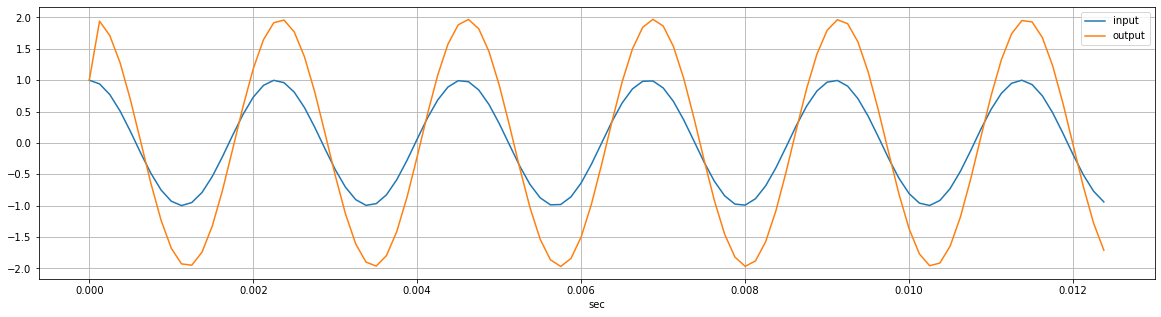

In [83]:
fs = 8000       # sampling rate (F)
dur = 1         # duration, 1 second
f0 = 440        # frequency to generate, you can change the frequency 


# input
x = np.cos(2*np.pi*f0*np.arange(dur*fs)/fs)

# delayed output
h1 = [1, 1]
y1 = np.convolve(x,h1)


plt.figure(figsize=(20, 5))

L = 100
n= np.arange(L)
plt.plot(n/fs, x[:L])
plt.plot(n/fs, y1[:L])
plt.grid(True)
plt.xlabel('sec')

plt.legend(['input','output'])


# Frequency Response

Text(0.5, 0, 'Frequency [rad/sample]')

<Figure size 720x360 with 0 Axes>

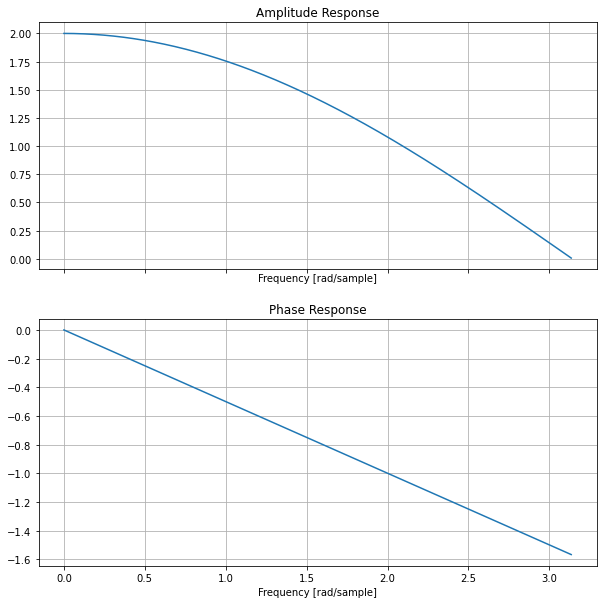

In [95]:
w, h = signal.freqz(h1)

plt.figure(figsize=(10, 5))

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,10))

ax[0].plot(w, np.abs(h))
ax[0].grid(True)
ax[0].set_title('Amplitude Response')
ax[0].set_xlabel('Frequency [rad/sample]')

ax[1].plot(w, np.angle(h))
ax[1].grid(True)
ax[1].set_title('Phase Response')
ax[1].set_xlabel('Frequency [rad/sample]')



# FIR Filters

In [32]:
x, sr = librosa.load("../audio/Snare.wav") 
#y, sr = librosa.load("../audio/white_noise.wav") 
print(sr)
ipd.Audio(x, rate=sr)


22050


### Simplest lowpass filter

In [19]:
h1 = [1, 1];
y1 = np.convolve(x,h1)

ipd.Audio(y1, rate=sr)

### Simplest highpass filter

In [20]:
h2 = [1, -1];
y2 = np.convolve(x,h2)

ipd.Audio(y2, rate=sr)

### Moving average filter

In [21]:
h3 = [1/5, 1/5, 1/5, 1/5, 1/5];
y3 = np.convolve(x,h3)

ipd.Audio(y3, rate=sr)

### Feedforward Comb filter

In [31]:
M = 50
h4 = np.zeros(M)
h4[0]= 1
h4[M-1] = 1

y4 = np.convolve(x,h4)

ipd.Audio(y4, rate=sr)


### Convolution Reverb

In [34]:
h5, sr = librosa.load("../audio/memchu_ir.wav") 
print(sr)

y5 = np.convolve(x,h5)

ipd.Audio(y5, rate=sr)


22050
